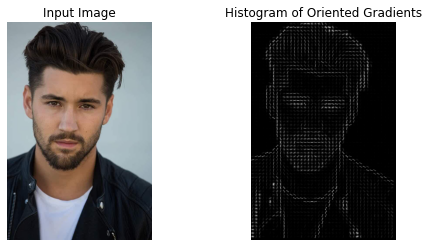

In [5]:
#face detection
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2
image = cv2.imread('jeff.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fd, hog_image=hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)
fig, (ax1, ax2)=plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')
hog_image_rescaled=exposure.rescale_intensity(hog_image, in_range=(0,10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [6]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

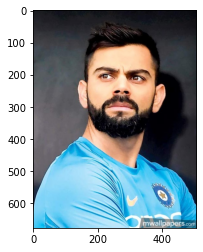

In [7]:
image=cv2.imread("kohli.jpg")
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [8]:
face_locations=face_recognition.face_locations(image)
number_of_faces=len(face_locations)
print("Found {} face(s) in input image".format(number_of_faces))

Found 1 face(s) in input image


A face is located at pixel location Top: 167, Left: 142, Bottom: 390, Right: 365


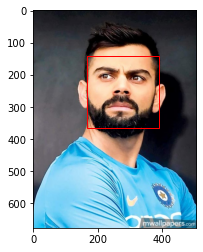

In [9]:
plt.imshow(image)
ax=plt.gca()
for face_location in face_locations:
    top,right,bottom,left=face_location
    x,y,w,h=left,top,right,bottom
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))
    rect=Rectangle((x, y), w-x, h-y, fill=False, color='red')
    ax.add_patch(rect)
plt.show()

In [10]:
#face recognition
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [11]:
image=cv2.imread("tyler.jpeg")
tyler=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image=cv2.imread("kohli.jpg")
kohli=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image=cv2.imread("jeff.jpg")
jeff=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [12]:
tyler_encoding=face_recognition.face_encodings(tyler)[0]
kohli_encoding=face_recognition.face_encodings(kohli)[0]
jeff_encoding=face_recognition.face_encodings(jeff)[0]
known_face_encodings=[tyler_encoding,kohli_encoding,jeff_encoding]

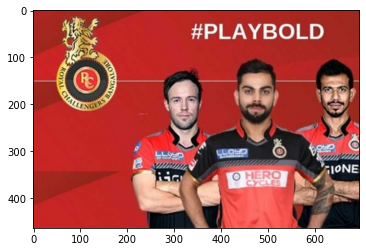

In [13]:
image=cv2.imread("rcb.jpg")
unknown_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
unknown_face_encodings=face_recognition.face_encodings(unknown_image)

In [14]:
from scipy.spatial import distance
for unknown_face_encoding in unknown_face_encodings:
    results=[]
    for known_face_encoding in known_face_encodings:
        d=distance.euclidean(known_face_encoding,unknown_face_encoding)
        results.append(d)
    threshold=0.6
    results=np.array(results) <= threshold
    name= "unknown"
    if results[0]:
        name="tyler"
    elif results[1]:
        name="kohli"
    elif results[2]:
        name="jeff"
    print(f"Found {name} in the photo.")

Found kohli in the photo.
Found unknown in the photo.
Found unknown in the photo.
